In [ ]:
!pip install keras_preprocessing

In [ ]:
pip install tensorflow

In [6]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense

from tensorflow.keras.preprocessing.image import load_img,ImageDataGenerator
from tensorflow.keras.utils import img_to_array
import matplotlib.pyplot as plt
from PIL import Image 
from glob import glob

In [7]:
train_path = '/content/drive/MyDrive/XuLiAnhSo/Dataset/Training'
test_path = '/content/drive/MyDrive/XuLiAnhSo/Dataset/Test'

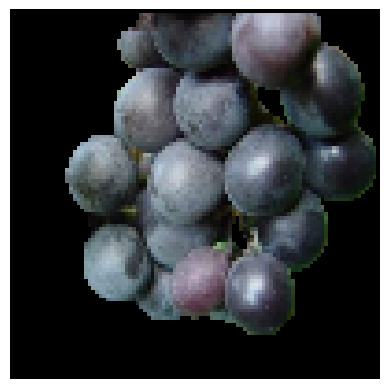

In [8]:
img = load_img(train_path + "/kyoho/kyoho (1).jpg", target_size=(100,100))
plt.imshow(img)
plt.axis("off")
plt.show()

In [9]:
images = ['champagne', 'cotton candy', 'crimson seedless', 'gewurztraminer', 'glenora', 'kyoho']
images1 = ['champagne', 'cottoncandy', 'crismon seedless', 'gewurztraminer', 'glenora', 'kyoho']

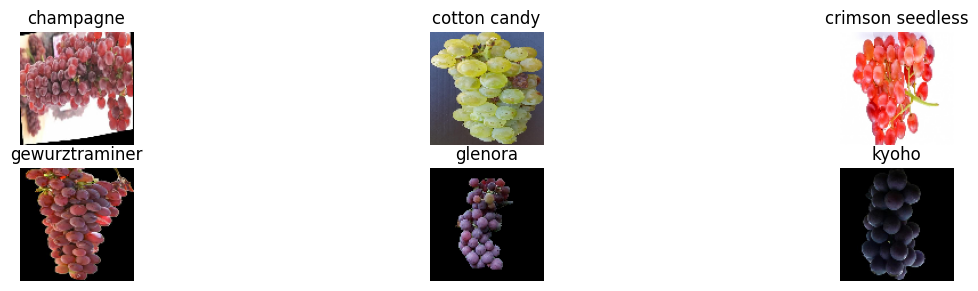

In [10]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize =(15,5))
for i in range(6):
    ax = fig.add_subplot(3,3,i+1,xticks=[],yticks=[])
    #fig.patch.set_facecolor('#E53090')
    #Above code adds a background color for subplots you can change the hex color code as you wish
    plt.title(images[i])
    plt.axis("off")
    ax.imshow(load_img(train_path + "/"+ images[i] +"/"+images1[i] + " (100).jpg", target_size=(100,100)))

In [11]:
x = img_to_array(img)
print(x.shape)

(100, 100, 3)


In [12]:
className = glob(train_path + '/*')
number_of_class = len(className)
print(number_of_class)

6


In [13]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape= x.shape))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3),))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3,3),))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(number_of_class))#output
model.add(Activation("softmax"))

In [14]:
model.compile(loss = "categorical_crossentropy",
             optimizer = "rmsprop",
             metrics = ["accuracy"])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 activation (Activation)     (None, 98, 98, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 47, 47, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                    

In [17]:
batch_size = 32

In [18]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                  shear_range = 0.3,
                  horizontal_flip=True,
                  vertical_flip=False,
                  zoom_range = 0.3
                  )
test_datagen  = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_path,
                                                    target_size=x.shape[:2],
                                                    batch_size = batch_size,
                                                    color_mode= "rgb",
                                                    class_mode = "categorical")
test_generator = test_datagen.flow_from_directory(test_path,
                                                    target_size=x.shape[:2],
                                                    batch_size = batch_size,
                                                    color_mode= "rgb",
                                                    class_mode = "categorical")

Found 895 images belonging to 6 classes.
Found 655 images belonging to 6 classes.


In [19]:
hist = model.fit_generator(generator = train_generator, 
                   steps_per_epoch = 900 // batch_size,
                   epochs = 25,
                   validation_data = test_generator,
                   validation_steps = 700 // batch_size)

<ipython-input-19-01023c69be00>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(generator = train_generator,


Epoch 1/25
28/28 [==============================] - 254s 9s/step - loss: 1.2553 - accuracy: 0.4715 - val_loss: 0.7189 - val_accuracy: 0.6351
Epoch 2/25
28/28 [==============================] - 54s 2s/step - loss: 0.6039 - accuracy: 0.7642 - val_loss: 0.5464 - val_accuracy: 0.7145
Epoch 3/25
28/28 [==============================] - 46s 2s/step - loss: 0.4261 - accuracy: 0.8246 - val_loss: 0.2025 - val_accuracy: 0.9344
Epoch 4/25
28/28 [==============================] - 49s 2s/step - loss: 0.3768 - accuracy: 0.8592 - val_loss: 0.1734 - val_accuracy: 0.9420
Epoch 5/25
28/28 [==============================] - 50s 2s/step - loss: 0.2568 - accuracy: 0.9285 - val_loss: 0.1705 - val_accuracy: 0.9466
Epoch 6/25
28/28 [==============================] - 50s 2s/step - loss: 0.2612 - accuracy: 0.9117 - val_loss: 0.1255 - val_accuracy: 0.9588
Epoch 7/25
28/28 [==============================] - 50s 2s/step - loss: 0.1905 - accuracy: 0.9385 - val_loss: 0.2921 - val_accuracy: 0.8885
Epoch 8/25
28/28 [=

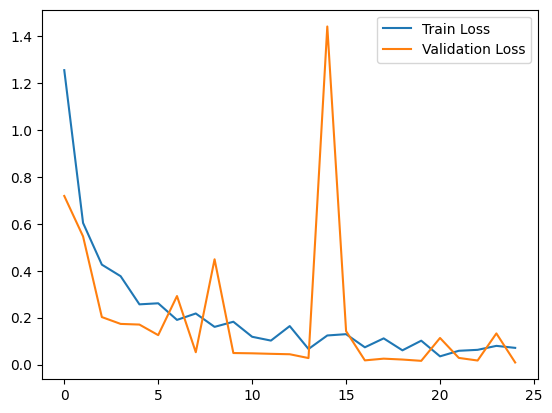

In [20]:
plt.plot(hist.history["loss"], label = "Train Loss")
plt.plot(hist.history["val_loss"], label = "Validation Loss")
plt.legend()
plt.show()

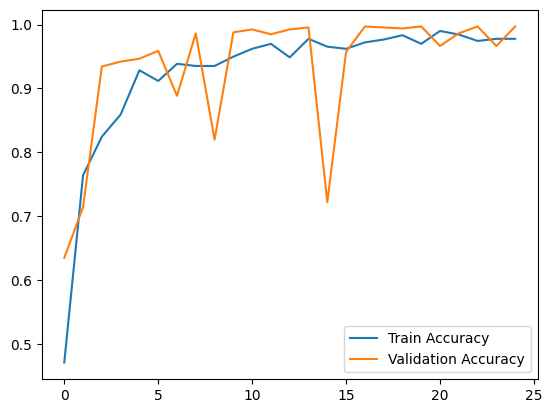

In [21]:
plt.plot(hist.history["accuracy"], label = "Train Accuracy")
plt.plot(hist.history["val_accuracy"], label = "Validation Accuracy")
plt.legend()
plt.show()

In [ ]:
# Predict the label of the test_images
pred = model.predict(test_generator)
pred = np.argmax(pred,axis=1)
# Map the label
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred1 = [labels[k] for k in pred]
pred1

In [23]:
def output(location):
    img=load_img(location,target_size=(100,100,3))
    img=img_to_array(img)
    img=img/255
    img=np.expand_dims(img,[0])
    answer=model.predict(img)
    y_class = answer.argmax(axis=-1)
    y = " ".join(str(x) for x in y_class)
    y = int(y)
    res = labels[y]
    return res

In [30]:
img = output('/content/drive/MyDrive/XuLiAnhSo/Dataset/Test/champagne/champagne (11).jpg')
img

1/1 [==============================] - 0s 27ms/step


'champagne'

In [31]:
model.save('models.h5')

# Mục mới